# Video Game Sales Analysis

Video games are a great way to pass some time. They allow us to escape our everyday reality and be transported into brand new worlds and realities if only for a few hours. Growing up I was always interested in video games. What made them so appealing? Why were they so captivating? How did they become a global phenomena? Video games went from being viewed as a temporary escape and time killer to a multi billion dollar industry with competitions with prizes in the millions. This craze did not happen over night. Throughout this analysis I hope to answer some of the following questions:
- Which genre of games is the most popular over the globe?
- Does culture have an effect on game genre tendencies?
- How does technological evolution affect game sales?
- Which company outranks the others in terms of sales?
- Do companies have a tendency to make games of the same genre?
- Which gaming platform is the most popular?
- Which gaming platform has the most of each genre?

These are just a few questions, that I hope my analysis and research should answer. Of course, there is always more answers and even more questions that our analysis would shine a light on.

In [1]:
# Import necessary libraries
import pandas as pd # Data Wrangling
import numpy as np # Linear Algebra
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import os # Data Importing/Wrangling
print('Libraries Imported!')

Libraries Imported!


In [2]:
# Getting path for data set
print('my path is', os.getcwd())

my path is /home/jovyan/demo


In [3]:
# Import the data set
vg = pd.read_csv('/home/jovyan/demo/vgsales.csv')
print('Dataset Imported!')

Dataset Imported!


## Cleaning the data set
In this section we will check for any missing values. We will drop the missing values. We will then examine the feature types, give a few details about them and move forward with the Exploratory Data Analysis

In [4]:
# Check for any missing values
vg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
# Drop the missing values
vg = vg.dropna()

# Check to make sure the missing values were dropped
vg.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [6]:
# Check the feature types
vg.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
# Convert the year feature from float64 type to integer
vg['Year'] = vg['Year'].astype(np.int64)

# Check the feature types again
vg.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

The Year column had 271 missing values and the Publisher Column had 58 missing values. These values were dropped to make our analusis of the data set easier. I also converted the Year column from a floating numeric value to an integer, since a year can be represented as an integer more easily.

## Exploratory Data Analysis
In this section we hope to answer some of the questions posed at the intro, and further explore the data set at hand

In [8]:
# Check the shape of the data
vg.shape

(16291, 11)

The data set consists of 16291 rows and 11 columns. These columns are the features that we will be analyzing and are as follows:
- Rank: Ranking of overall sales
- Name: The Name of the video game
- Platform: The Platform the video game is on
- Year: The Year the game was released
- Genre: The Genre of the video game
- Publisher: The Publishing Studio of the video game
- NA_Sales: Total sales of the video game in North America (in millions)
- EU_Sales: Total sales of the video game in Europe (in millions)
- JP_Sales: Total sales of the video game in Japan (in millions)
- Other_Sales: Total sales of the video game in the rest of the world (in millions)
- Global_Sales: Total sales of the video game in Worldwide (in millions)

### Analysis by Genre

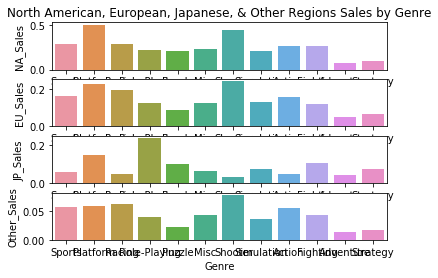

In [9]:
# Visualize the number of sales of each genre in each of the regions 
fig, axs  = plt.subplots(4,1)
plt.rcParams['figure.figsize'] = (12,12)
sns.barplot(x = 'Genre', y = 'NA_Sales', data = vg, ax = axs[0], ci = None).set(title = 'North American, European, Japanese, & Other Regions Sales by Genre')
sns.barplot(x = 'Genre', y = 'EU_Sales', data = vg, ax = axs[1], ci = None)
sns.barplot(x = 'Genre', y = 'JP_Sales', data = vg, ax = axs[2], ci = None)
sns.barplot(x = 'Genre', y = 'Other_Sales', data = vg, ax=axs[3], ci = None)

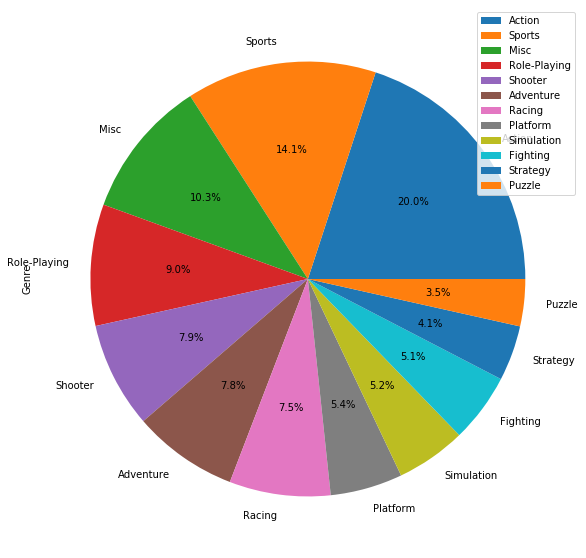

In [10]:
# Visualize the percentage of games per genre
vg_gen = pd.DataFrame(vg['Genre'].value_counts(normalize = True))
plot = vg_gen.plot.pie(subplots = True, autopct = '%1.1f%%', figsize = (10,10))

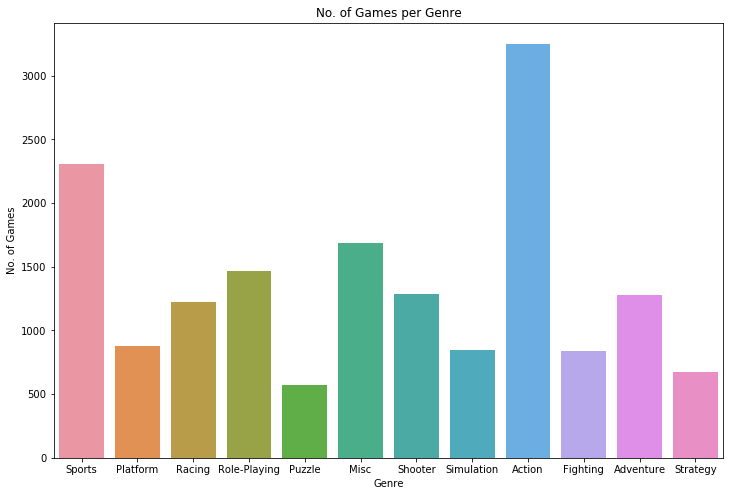

In [11]:
# Visualize the number of games per genre in the data set
fig = plt.subplots(figsize = (12,8))
ax = sns.countplot(x = 'Genre', data = vg)
ax.set(xlabel = 'Genre', ylabel = 'No. of Games', title = 'No. of Games per Genre')
plt.show()

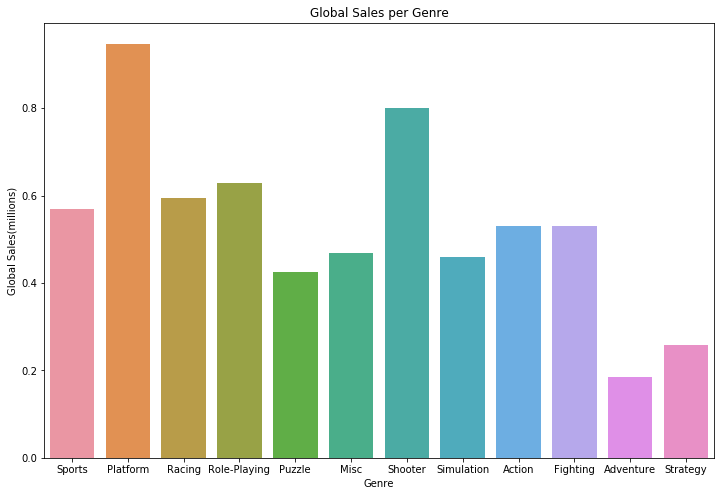

In [12]:
# Visualize the Global Sales per Genre
fig = plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'Genre', y  = 'Global_Sales', data = vg, ci = None)
ax.set(xlabel = 'Genre', ylabel = 'Global Sales(millions)', title = 'Global Sales per Genre')
plt.show()

In [13]:
# Find the value counts per Genre
vg['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

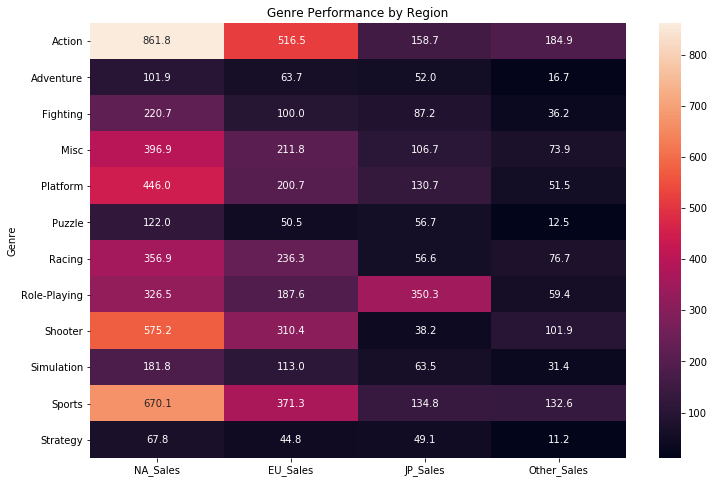

In [14]:
# Build a heatmap to see how each genre performed by region
vg_genre  =vg[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
vg_genre_compare = vg_genre.groupby(by = ['Genre']).sum()
fig = plt.subplots(figsize = (12,8))
ax = sns.heatmap(vg_genre_compare, annot = True, fmt = '.1f')
ax.set(title = 'Genre Performance by Region')
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


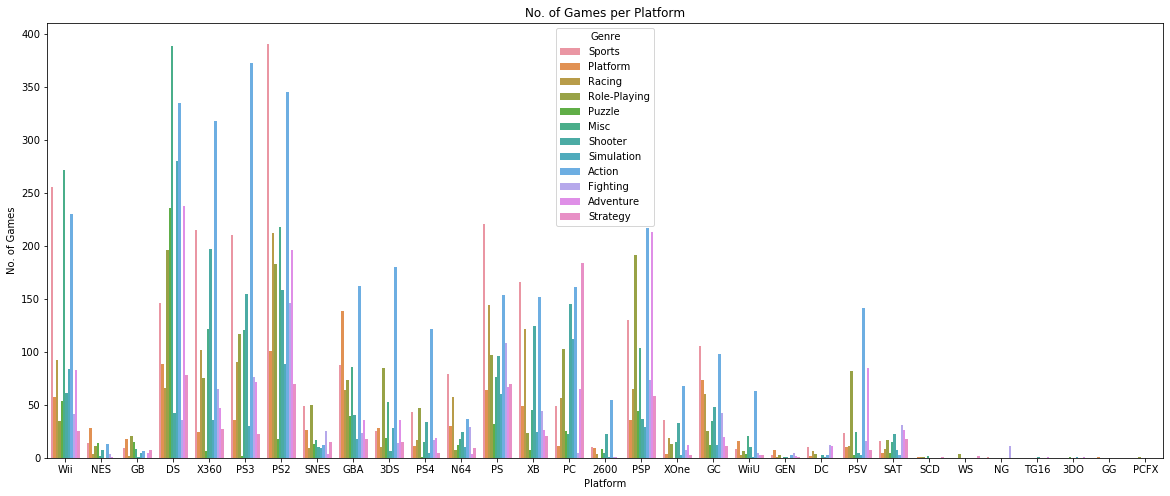

In [15]:
# Visualize the number of genre per platform
fig = plt.subplots(figsize = (20,8))
ax = sns.countplot(vg['Platform'], hue = vg['Genre'])
ax.set(xlabel = 'Platform', ylabel = 'No. of Games', title = 'No. of Games per Platform')
plt.show()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


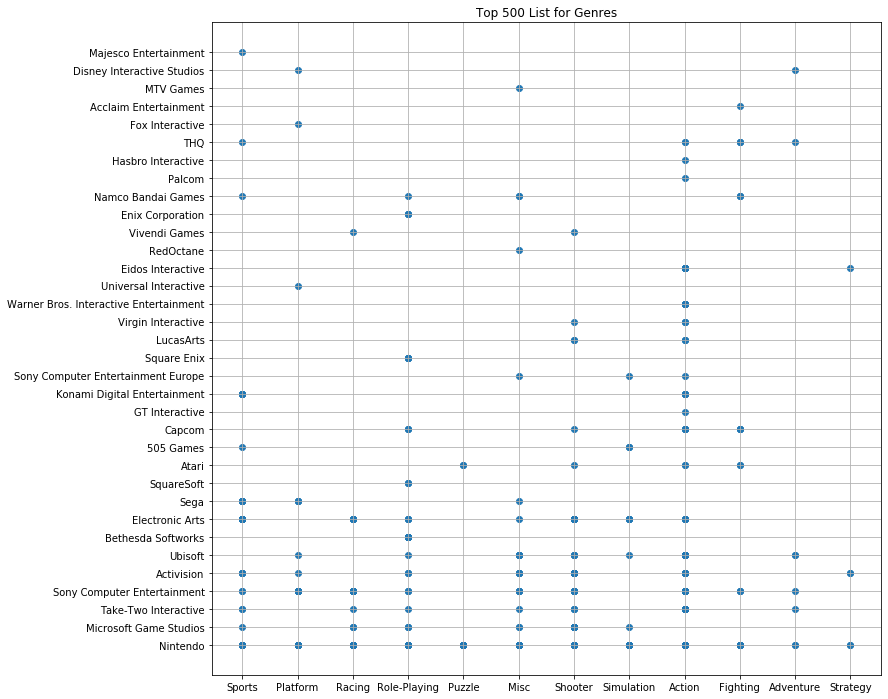

In [16]:
vg_rank = vg.head(500)
vg_rank.Genre = vg_rank.Genre.astype(str)
vg_rank.Publisher = vg_rank.Publisher.astype(str)
plt.scatter(vg_rank['Genre'], vg_rank['Publisher'])
plt.title('Top 500 List for Genres')
plt.grid()

### Genre Conclusions
- Platforming and Shooting games outperformed other game genres in the North American and European Markets
- Role Playing games outperformed other game genres in the Japanese Market
- Action games comprised of 20% or 3251 games of the data set where as puzzles only comprised of 3.5% or 570 games of the data set
- The heat map shows which genres are responsible for a majority of each regional markets sales
- Platforming and Shootings games outperformed other game genres in global sales (This would seem apparent as the North American and European Markets make up a majority of the sales of these genres)
- The Nintendo DS game catalogue consisted mainly of Puzzle and Action games
- According to the scatter plot:
    - Nintendo seems to make at least a game of every genre
    - Every publisher seems to make a game of almost every genre save for a few

### Analysis by Year

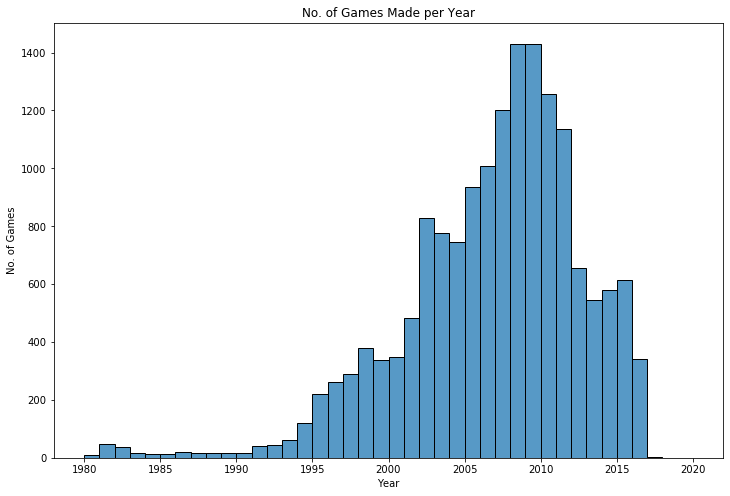

In [17]:
# Visualize the number of games made per year
fig = plt.subplots(figsize = (12,8))
ax = sns.histplot(vg['Year'], bins = 40)
ax.set(xlabel = 'Year', ylabel = 'No. of Games', title = 'No. of Games Made per Year')
plt.show()

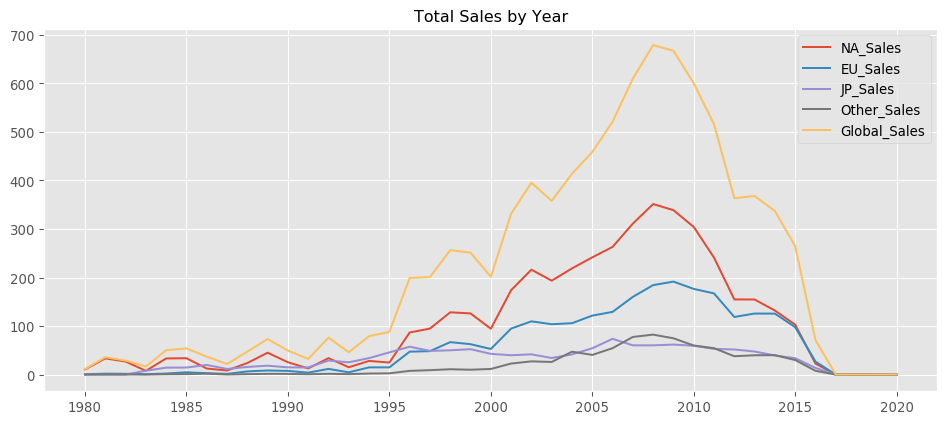

In [18]:
# Visualize the global sales per year
sales_tot = vg[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby(by = 'Year', as_index = False).sum()
plt.style.use('ggplot')
plt.figure(figsize = (12, 5), dpi = 96)
plt.title("Total Sales by Year", fontsize = 12)
for col in sales_tot.columns[1:]:
    plt.plot(sales_tot['Year'], sales_tot[col], label = col)
plt.legend()
plt.show()

### Year Conclusions
Based on the above graphs:
- A majority of games came out around 2008-2009 then started to decline around 2010-2011. This could be due to games taking longer in development with more advanced software and hardware
- The regional market sales graph follows the above statement. The longer it would take to put out a game, the less sales a company would have that year. 
- Market sales seemed to peak around 2008-2010, followed by a steady decline until 2020.

### Analysis by Games

Text(0.5, 1.0, 'Top 10 Games Globally')

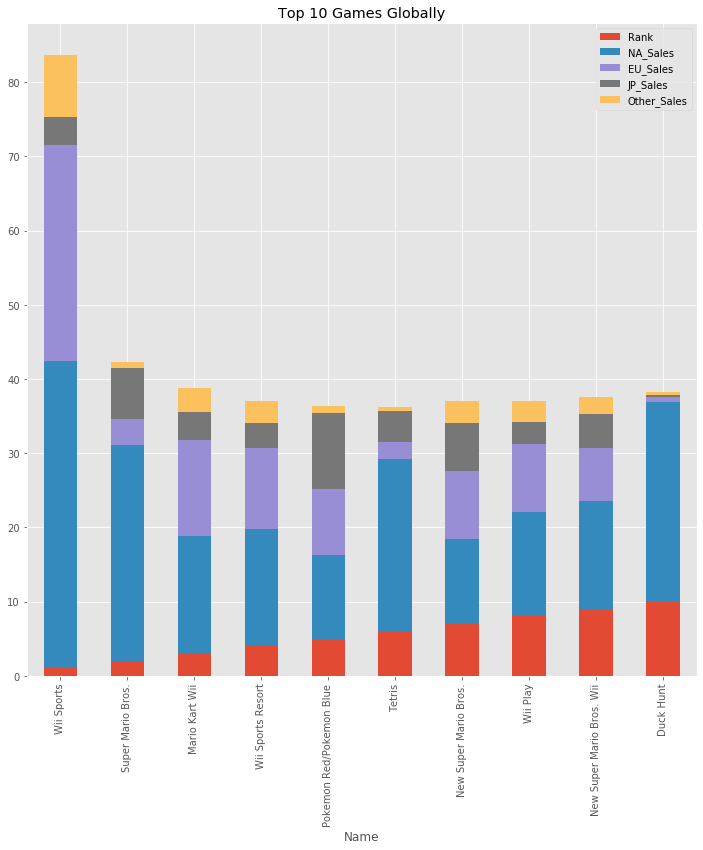

In [19]:
# Visualize the top 10 games globablly
vg_10 = vg.drop(columns = ['Year', 'Global_Sales']).head(10)
ax = vg_10.plot.bar(x = 'Name', stacked = True)
plt.title('Top 10 Games Globally')

Text(0.5, 1.0, 'Best Selling Games in North America')

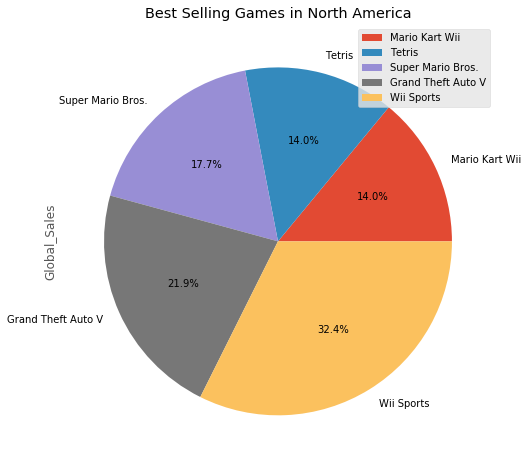

In [20]:
# Visualize the best selling games globally pie chart
vg_G = pd.DataFrame(vg.groupby('Name')['Global_Sales'].sum())
vg_G.sort_values(by = ['Global_Sales'], inplace = True)
vg_G = vg_G.tail(5)
vg_G.plot.pie(y = 'Global_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Games in North America')

Text(0.5, 1.0, 'Best Selling Games in Rest of the World')

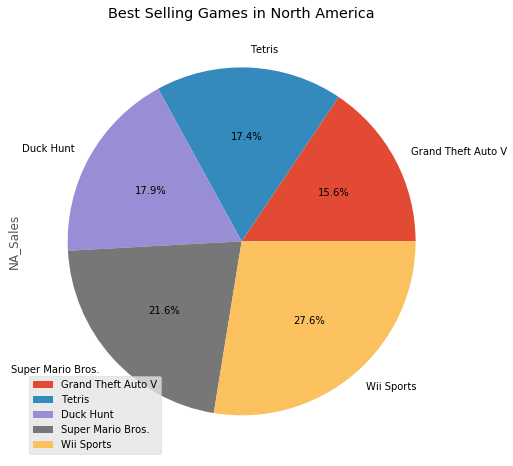

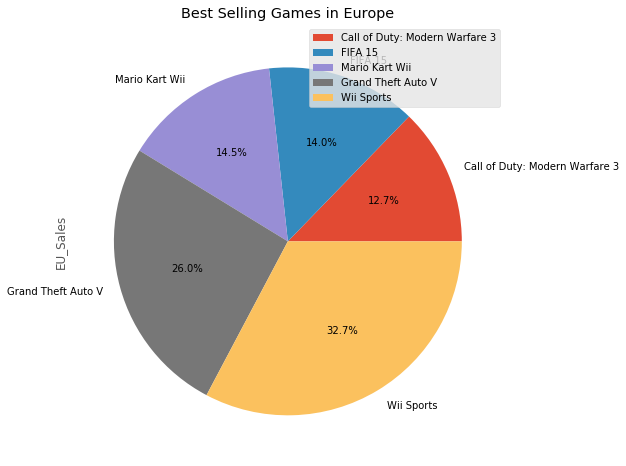

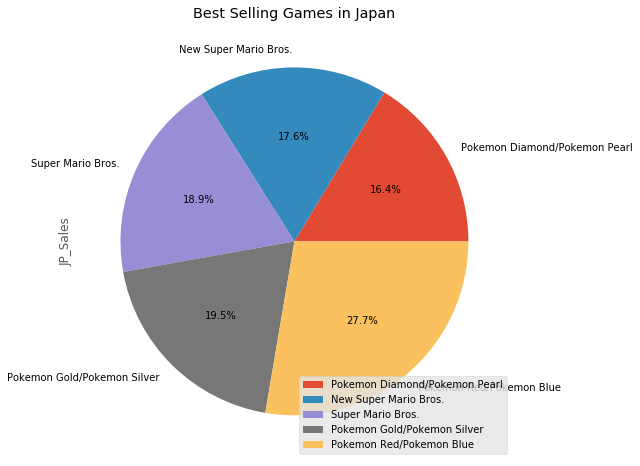

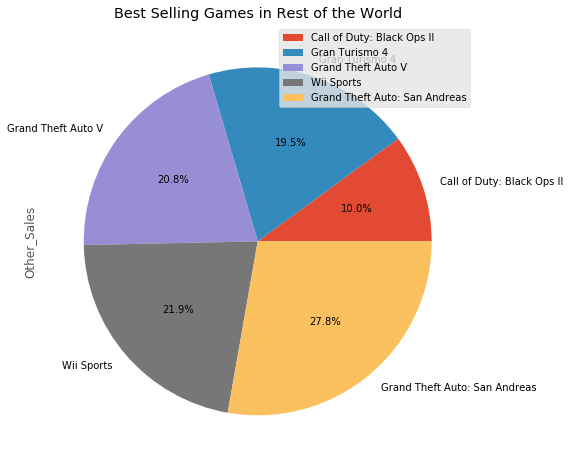

In [21]:
# Visualize the best selling games in each regional market
vg_NA = pd.DataFrame(vg.groupby('Name')['NA_Sales'].sum())
vg_NA.sort_values(by = ['NA_Sales'], inplace = True)
vg_NA = vg_NA.tail(5)
vg_NA.plot.pie(y = 'NA_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Games in North America')

vg_EU = pd.DataFrame(vg.groupby('Name')['EU_Sales'].sum())
vg_EU.sort_values(by = ['EU_Sales'], inplace = True)
vg_EU = vg_EU.tail(5)
vg_EU.plot.pie(y = 'EU_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Games in Europe')

vg_JP = pd.DataFrame(vg.groupby('Name')['JP_Sales'].sum())
vg_JP.sort_values(by = ['JP_Sales'], inplace = True)
vg_JP = vg_JP.tail(5)
vg_JP.plot.pie(y = 'JP_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Games in Japan')

vg_O = pd.DataFrame(vg.groupby('Name')['Other_Sales'].sum())
vg_O.sort_values(by = ['Other_Sales'], inplace = True)
vg_O = vg_O.tail(5)
vg_O.plot.pie(y = 'Other_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Games in Rest of the World')

### Games Conclusion
From the above graphs and analysis we can see that:
- Globally, Wii Sports and Grand Theft Auto V led the global sales by 27.6% and 21.6% respectively
- In terms of the regional sales:
    - Wii Sports and Super Mario Bros led the North American sales by 27.6% and 21.6% respectively
    - Wii Sports and Grand Theft Auto V led the European sales by 32.7% and 26% respectively
    - Pokemon Red/Blue and Pokemon Gold/Silber led the Japanese sales by 27.7% and 19.5% respectively
    - Grand Theft Auto: San Andreas, Wii Sports led the sales throughout the rest of the world by 27.8% and 21.9% respectively. Followed closely behind by Grand Theft Auto V with 20.8%

### Analysis by Publisher

Text(0.5, 1.0, 'Best Selling Publishers in the Rest of the World')

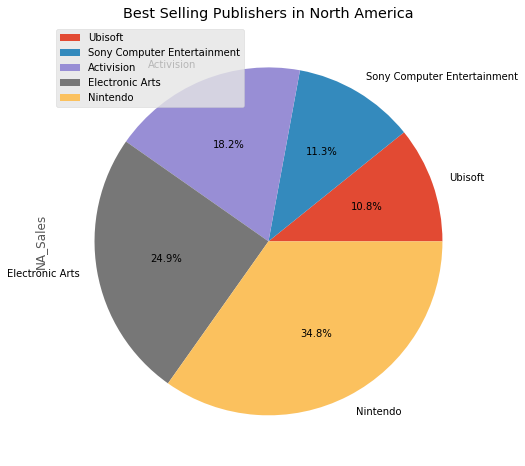

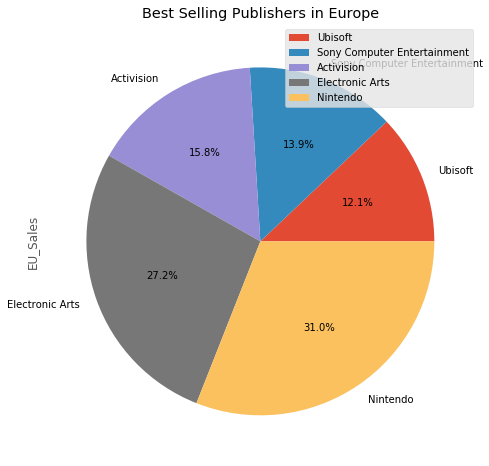

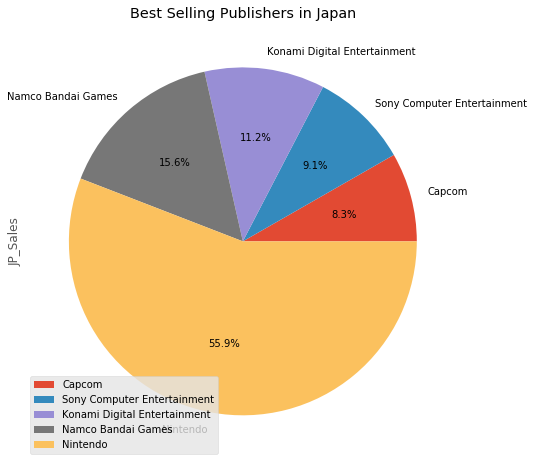

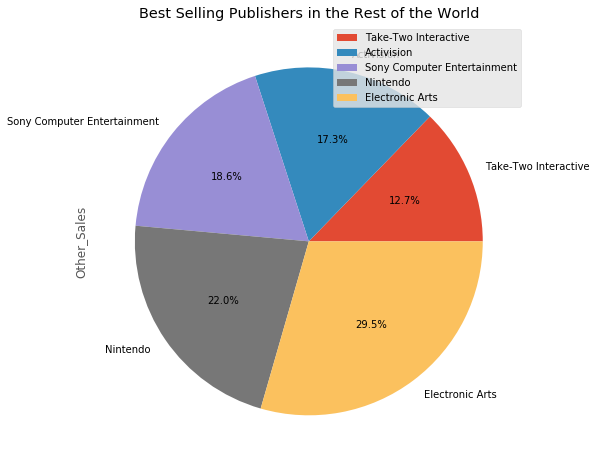

In [22]:
# Visualize the best selling publishers in each regional market
vg_NA = pd.DataFrame(vg.groupby('Publisher')['NA_Sales'].sum())
vg_NA.sort_values(by = ['NA_Sales'], inplace = True)
vg_NA = vg_NA.tail(5)
vg_NA.plot.pie(y = 'NA_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Publishers in North America')

vg_EU = pd.DataFrame(vg.groupby('Publisher')['EU_Sales'].sum())
vg_EU.sort_values(by = ['EU_Sales'], inplace = True)
vg_EU = vg_EU.tail(5)
vg_EU.plot.pie(y = 'EU_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Publishers in Europe')

vg_JP = pd.DataFrame(vg.groupby('Publisher')['JP_Sales'].sum())
vg_JP.sort_values(by = ['JP_Sales'], inplace = True)
vg_JP = vg_JP.tail(5)
vg_JP.plot.pie(y = 'JP_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Publishers in Japan')

vg_O = pd.DataFrame(vg.groupby('Publisher')['Other_Sales'].sum())
vg_O.sort_values(by = ['Other_Sales'], inplace = True)
vg_O = vg_O.tail(5)
vg_O.plot.pie(y = 'Other_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Publishers in the Rest of the World')

Text(0.5, 1.0, 'Best Selling Publishers Globally')

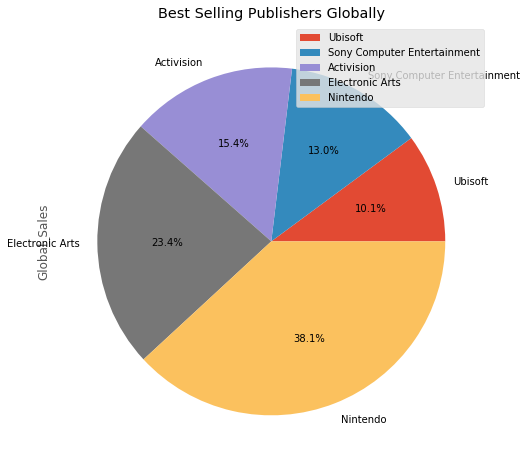

In [23]:
# Visualize the best selling publishers globally
vg_G = pd.DataFrame(vg.groupby('Publisher')['Global_Sales'].sum())
vg_G.sort_values(by = ['Global_Sales'], inplace = True)
vg_G = vg_G.tail(5)
vg_G.plot.pie(y = 'Global_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Publishers Globally')

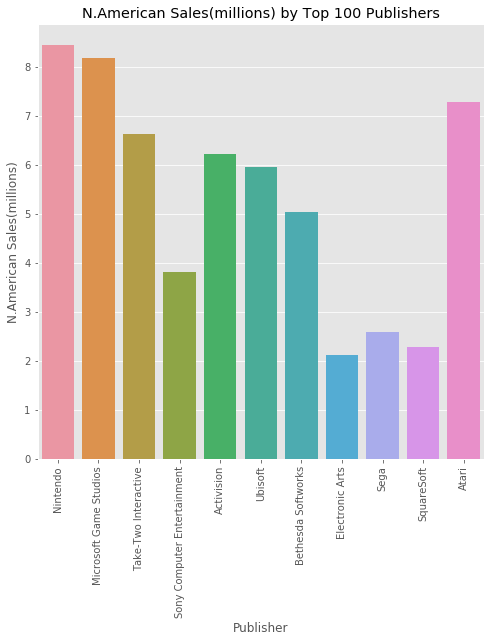

In [24]:
# Visualize the top 100 publishers in North America
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Publisher', y = 'NA_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Publisher', ylabel = 'N.American Sales(millions)', title = 'N.American Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

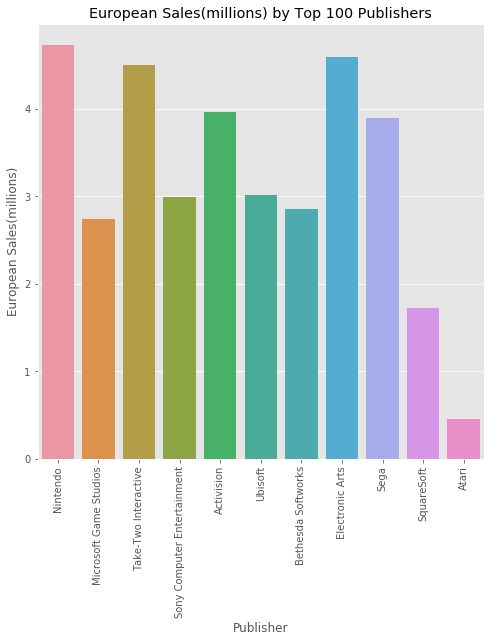

In [25]:
# Visualize the top 100 publishers in Europe
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Publisher', y = 'EU_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Publisher', ylabel = 'European Sales(millions)', title = 'European Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

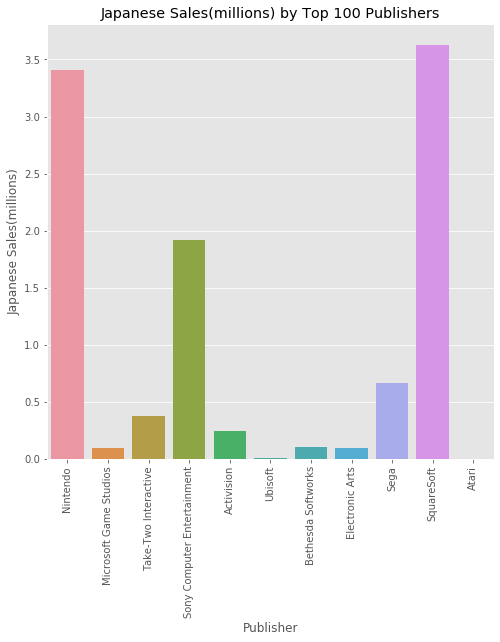

In [26]:
# Visualize the top 100 publishers in Japan
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Publisher', y = 'JP_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Publisher', ylabel = 'Japanese Sales(millions)', title = 'Japanese Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

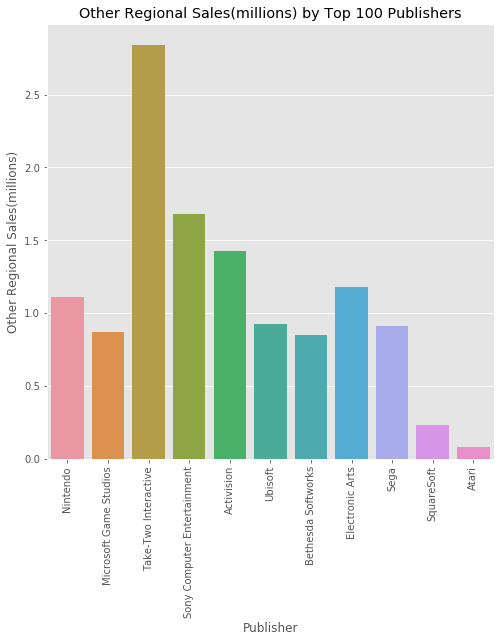

In [27]:
# Visualize the top 100 publishers in the rest of the world
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Publisher', y = 'Other_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Publisher', ylabel = 'Other Regional Sales(millions)', title = 'Other Regional Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

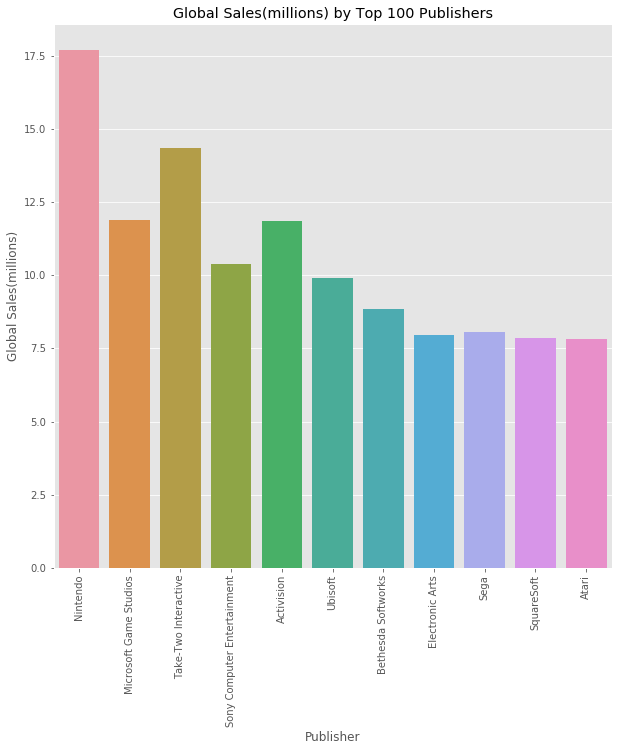

In [28]:
#Visualize the top 100 publishers globally
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = 'Publisher', y = 'Global_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Publisher', ylabel = 'Global Sales(millions)', title = 'Global Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

### Publisher Conclusions
Based on the analysis done and the visualizations above a few things are apparent:
- Electronic Arts (EA) is the top publisher in both the North American and European Markets as well as the rest of the worlds markets, with 24.9%, 27.2%, 29.5% of games being published by EA respectively
- In the Japanese Market Nintendo is the largest publisher making up for 55.9% of all games published.
- In the Global Market, Nintendo comprised of 38.1% followed up by EA with 23.4% of all games

### Analysis by Platform

In [29]:
# Obtain the value counts of all platforms
vg['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Text(0.5, 1.0, 'Best Selling Platforms Globally')

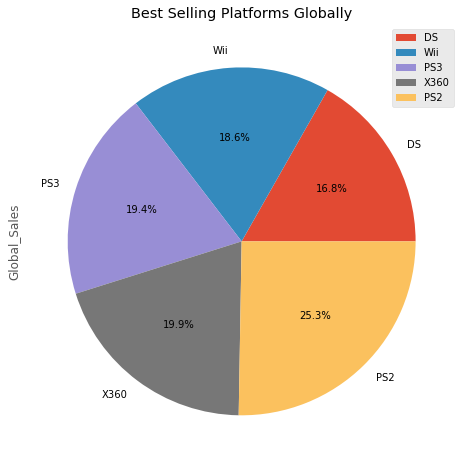

In [31]:
# Visualize the best selling platforms globally
vg_p = pd.DataFrame(vg.groupby('Platform')['Global_Sales'].sum())
vg_p.sort_values(by = ['Global_Sales'], inplace = True)
vg_p = vg_p.tail(5)
vg_p.plot.pie(y = 'Global_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Platforms Globally')

Text(0.5, 1.0, 'Best Selling Platforms in the Rest of the World')

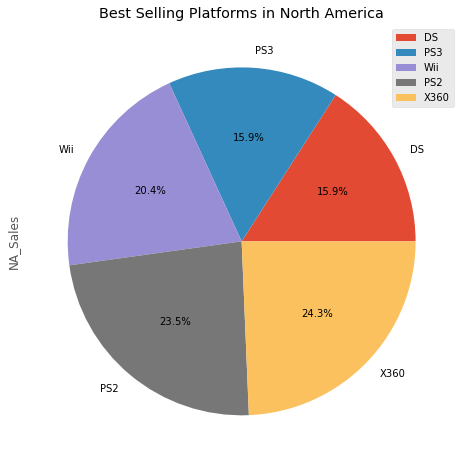

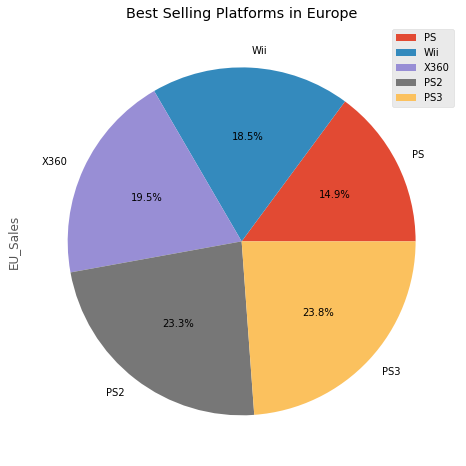

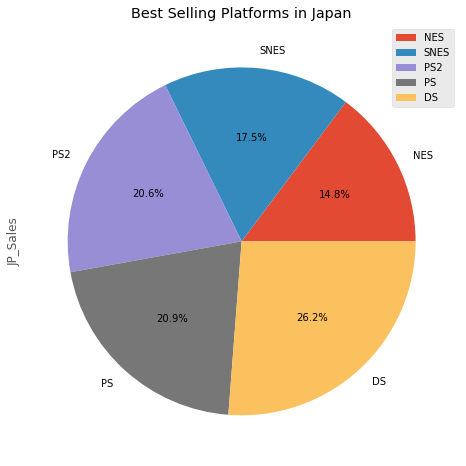

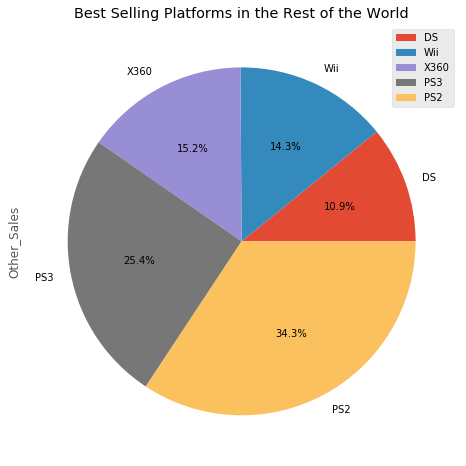

In [33]:
# Visualize the best selling platforms in all the other regional markets
vg_NA = pd.DataFrame(vg.groupby('Platform')['NA_Sales'].sum())
vg_NA.sort_values(by = ['NA_Sales'], inplace = True)
vg_NA = vg_NA.tail(5)
vg_NA.plot.pie(y = 'NA_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Platforms in North America')

vg_EU = pd.DataFrame(vg.groupby('Platform')['EU_Sales'].sum())
vg_EU.sort_values(by = ['EU_Sales'], inplace = True)
vg_EU = vg_EU.tail(5)
vg_EU.plot.pie(y = 'EU_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Platforms in Europe')

vg_JP = pd.DataFrame(vg.groupby('Platform')['JP_Sales'].sum())
vg_JP.sort_values(by = ['JP_Sales'], inplace = True)
vg_JP = vg_JP.tail(5)
vg_JP.plot.pie(y = 'JP_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Platforms in Japan')

vg_O = pd.DataFrame(vg.groupby('Platform')['Other_Sales'].sum())
vg_O.sort_values(by = ['Other_Sales'], inplace = True)
vg_O = vg_O.tail(5)
vg_O.plot.pie(y = 'Other_Sales', autopct = '%1.1f%%', figsize = (8,8))
plt.title('Best Selling Platforms in the Rest of the World')

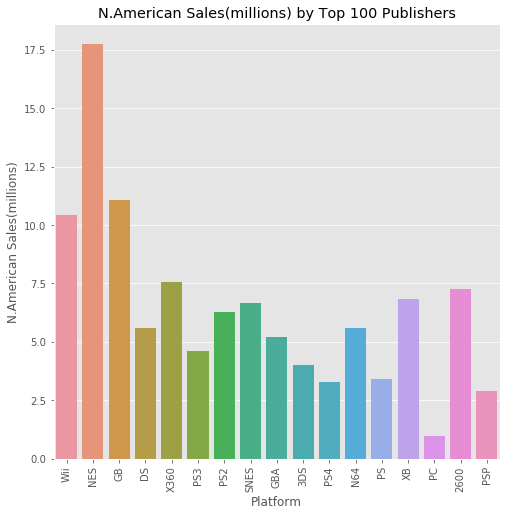

In [34]:
# Visualize the top 100 platforms in North America
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Platform', y = 'NA_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Platform', ylabel = 'N.American Sales(millions)', title = 'N.American Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

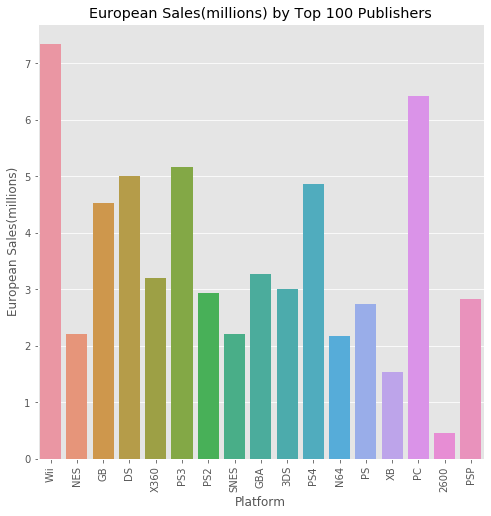

In [35]:
# Visualize the top 100 publishers in Europe
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Platform', y = 'EU_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Platform', ylabel = 'European Sales(millions)', title = 'European Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

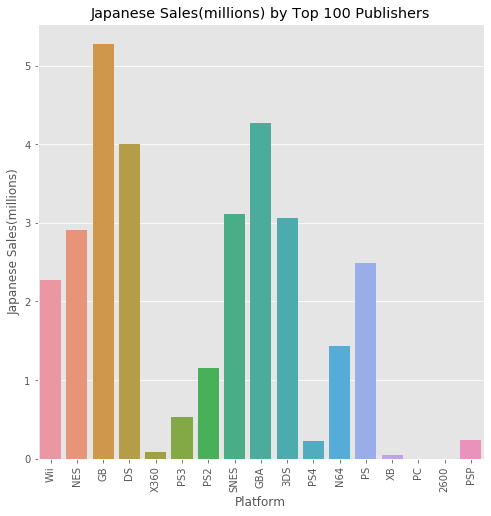

In [36]:
# Visualize the top 100 publishers in Japan
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Platform', y = 'JP_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Platform', ylabel = 'Japanese Sales(millions)', title = 'Japanese Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

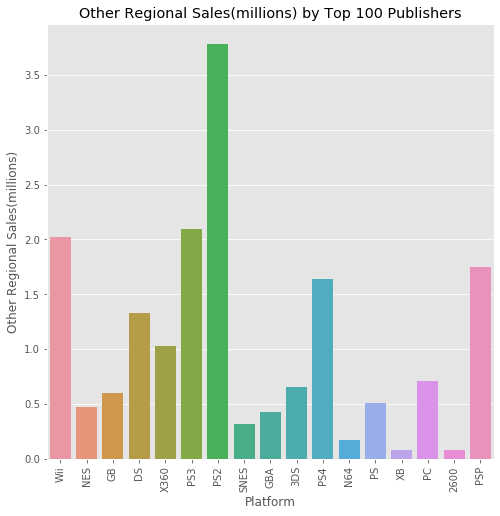

In [37]:
# Visualize the top 100 publishers in the rest of the world
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (8,8))
ax = sns.barplot(x = 'Platform', y = 'Other_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Platform', ylabel = 'Other Regional Sales(millions)', title = 'Other Regional Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

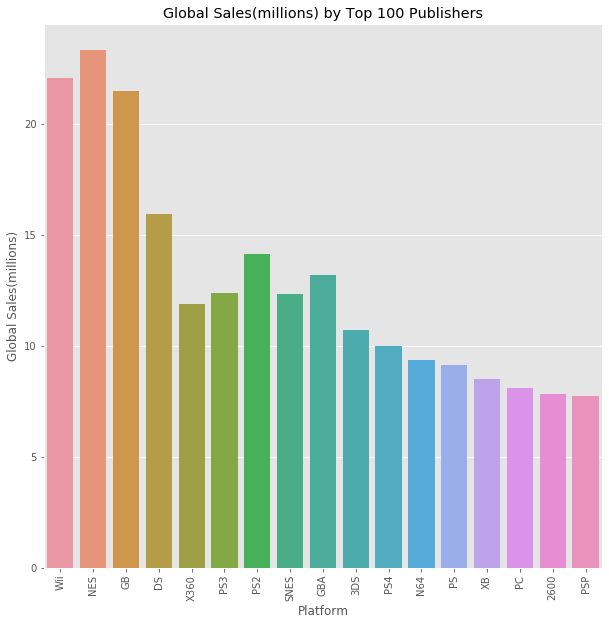

In [38]:
#Visualize the top 100 publishers globally
vg_rank = vg.head(100)
fig = plt.subplots(figsize = (10,10))
ax = sns.barplot(x = 'Platform', y = 'Global_Sales', data = vg_rank, ci = None)
ax.set(xlabel = 'Platform', ylabel = 'Global Sales(millions)', title = 'Global Sales(millions) by Top 100 Publishers')
plt.xticks(rotation = 'vertical')
plt.show()

### Platform Conclusions
Based on the above analyses we can see that:
- For the global market the top three platforms were the Playstation 2(PS2), XBox 360, and the Playstation 3 (PS3) comprising of 25.2%, 19.9%, and 18.4% respectively
- For the North American market the top three platforms were the PS3, the PS2, and the Nintendo Wii comprising of 24.3%, 23.5%, and 20.4% respectively
- For the European market the top three platforms were the PS3, the PS2, and the Xbox 360 comprising of 23.8%, 23.3%, and 19.5% respectively
- For the Japanese market the top three platforms were the Nintendo DS, Sony Playstation, and the PS2 comprising of 26.2%, 20.9%, and 20.6% respectively
- For the other world markets the top three platforms were the PS2, PS3, and the Xbox 360 comprising of 34.3%, 25.4%, and 15.2%

## General Conclusions
Overall, we know that video games are insanely popular throughout the entire world. The sales from video games alone reach into the millions. Video games are indeed an art form that crosses all sorts of gender, class, creed, and socio-economic borders. They are fun for old and young alike. Each culture has varying preferences on different games. 

We saw that the Japanese market preferred more story driven role playing games, where as the rest of the markets throughout the world preferred action, platforming, and shooting games. As our technology advances, our abilities to make better, more immersive games increases as well. This is clear by the histogram of the number of games per year. We see a large uptick around 2008-2010, at this point Sony's Playstation 3 has been on the market for 4 years, Microsoft's Xbox 360 has been out for 5 years, and the Nintendo Wii has been out for 4 years as well. During this time however, not everyone in every market had these newer consoles. All three of these companies were still producing games for the previous generation of consoles too. Time went on and in 2013, Sony launched the Playstation 4 to compete with Microsofts Xbox One. The time it took to develop games for these newer platforms with more complex hardware increased. This is shown in the same histogram by the sharp decrease in games being produced. 

At the end of the day, the console/platform wars will rage on. Each company will continue vying for a higher percentage of each market. However, as a consumer, my goal remains the same, and that is to be entertained for a few hours. To have the ability to escape my own reality and venture off to a far away land.
